In [1]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pylab as plt

%matplotlib inline

np.set_printoptions(precision=3, linewidth=150, suppress=True)

In [2]:
def solve_triangular(L,b):
    x = np.copy(b)
    x[0] = b[0] / L[0,0]
    for i in range(1,len(x)):
        x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
    return x

def gauss_seidel_r(A, b, x0, w, n):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    LD_w = D / w + L
    D_U = ((1-w) / w) * D - U
    x = [x0]
    for i in range(n):
        x0 = solve_triangular(LD_w, (D_U @ x0) + b)
        x.append(x0)
    return x

In [3]:
np.random.seed(123)
A = np.random.randint(10, size=(4,4))
b = A.sum(axis=1)
x0 = np.random.random(4)

res = gauss_seidel_r(A, b, x0, w=0.2, n=100)
print(res[-1])

[1. 1. 1. 1.]


In [4]:
def plot_convergences(values, result):
    error = np.square(values - result).sum(axis = -1) / np.square(result).sum(axis=-1)
    error2 = np.square(np.diff(values)).sum(axis = -1) / np.square(values).sum(axis=-1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    ax1.plot(range(len(error)), error)
    ax1.set_title('Erreur absolue normalisée')
    ax1.semilogy();
    ax2.plot(range(len(error2)), error2)
    ax2.set_title('Erreur relative normalisée')
    ax2.semilogy()
    print("Itération du minimum :",np.argmin(error), np.argmin(error2))

Itération du minimum : 100 100


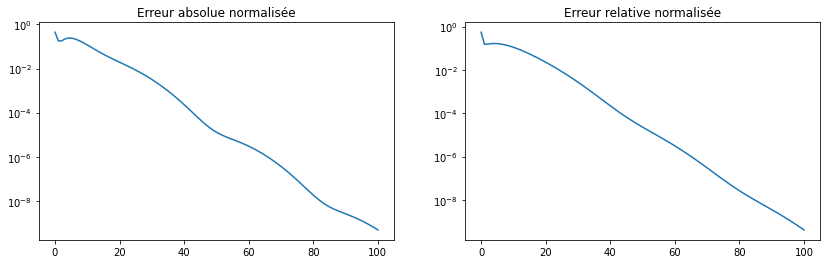

In [5]:
plot_convergences(res, np.ones(4))

In [15]:
def find_seed():
    i = 0
    ones = np.ones(4)
    opt = 1e-2
    opt0 = 1000
    seed = i
    while True:
        np.random.seed(i)
        i += 1
        A = np.random.randint(10, size=(4,4))
        b = A.sum(axis=1)
        x0 = np.random.random(4)

        try:
            res = gauss_seidel_r(A, b, x0, w=0.2, n=500)
            res0 = gauss_seidel_r(A, b, x0, w=1, n=500)
            e = np.abs(ones - res[-1])
            e0 = np.abs(ones - res0[-1])
            dist = e.sum()
            dist0 = e0.sum()
            if dist < opt and dist0 > opt0:
                opt = dist
                opt0 = dist0
                print(i)
        except RuntimeWarning:
            continue

In [16]:
find_seed()


<ipython-input-2-3a34c5dded66>:5: RuntimeWarning: divide by zero encountered in double_scalars
  x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
<ipython-input-2-3a34c5dded66>:5: RuntimeWarning: invalid value encountered in matmul
  x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
<ipython-input-2-3a34c5dded66>:16: RuntimeWarning: invalid value encountered in matmul
  x0 = solve_triangular(LD_w, (D_U @ x0) + b)
<ipython-input-2-3a34c5dded66>:16: RuntimeWarning: overflow encountered in matmul
  x0 = solve_triangular(LD_w, (D_U @ x0) + b)
<ipython-input-2-3a34c5dded66>:5: RuntimeWarning: overflow encountered in matmul
  x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
<ipython-input-2-3a34c5dded66>:5: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
<ipython-input-2-3a34c5dded66>:5: RuntimeWarning: overflow encountered in double_scalars
  x[i] = (b[i] - L[i,:i] @ x[:i]) / L[i,i]
<ipython-input-2-3a34c5dded66>:3: RuntimeWarning: divide by zero encountered in

88
110
437


KeyboardInterrupt: 